In [1]:
from pandas import read_csv, Series
from numpy import std, array
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from matplotlib.pyplot import subplots
from joblib import dump
from os.path import basename

In [2]:
list_target = ['sharp', 'defocused_blurred', 'motion_blurred', 'blur', 'band', 'noise', 'exposure', 'glare', 'dark', 'constant']
dict_target = {k: j for j, k in enumerate(list_target)}
dict_target

{'sharp': 0,
 'defocused_blurred': 1,
 'motion_blurred': 2,
 'blur': 3,
 'band': 4,
 'noise': 5,
 'exposure': 6,
 'glare': 7,
 'dark': 8,
 'constant': 9}

In [3]:
df = read_csv("df_public.csv")
array_number = array([int(basename(x).split("_")[0]) for x in df["path"]])
x = df.loc[:, ~df.columns.isin(("target", "dataset", "path"))]
y = df["target"].replace(dict_target).values
id_ths = 250
x_train = x.loc[array_number <= id_ths, :]
y_train = y[array_number <= id_ths]
x_test = x.loc[array_number > id_ths, :]
y_test = y[array_number > id_ths]

In [4]:
model = RandomForestClassifier(random_state=1102, n_estimators=500)
model.fit(x_train, y_train)
print(
    classification_report(
        y_test, model.predict(x_test), 
        target_names=list_target
    )
)

                   precision    recall  f1-score   support

            sharp       0.84      0.88      0.86        99
defocused_blurred       0.57      0.64      0.60        99
   motion_blurred       0.60      0.49      0.54        99
             blur       0.94      0.96      0.95        99
             band       0.84      0.73      0.78        99
            noise       0.97      1.00      0.99        99
         exposure       1.00      1.00      1.00        99
            glare       0.92      0.95      0.94        99
             dark       0.93      0.99      0.96        99
         constant       1.00      1.00      1.00        99

         accuracy                           0.86       990
        macro avg       0.86      0.86      0.86       990
     weighted avg       0.86      0.86      0.86       990



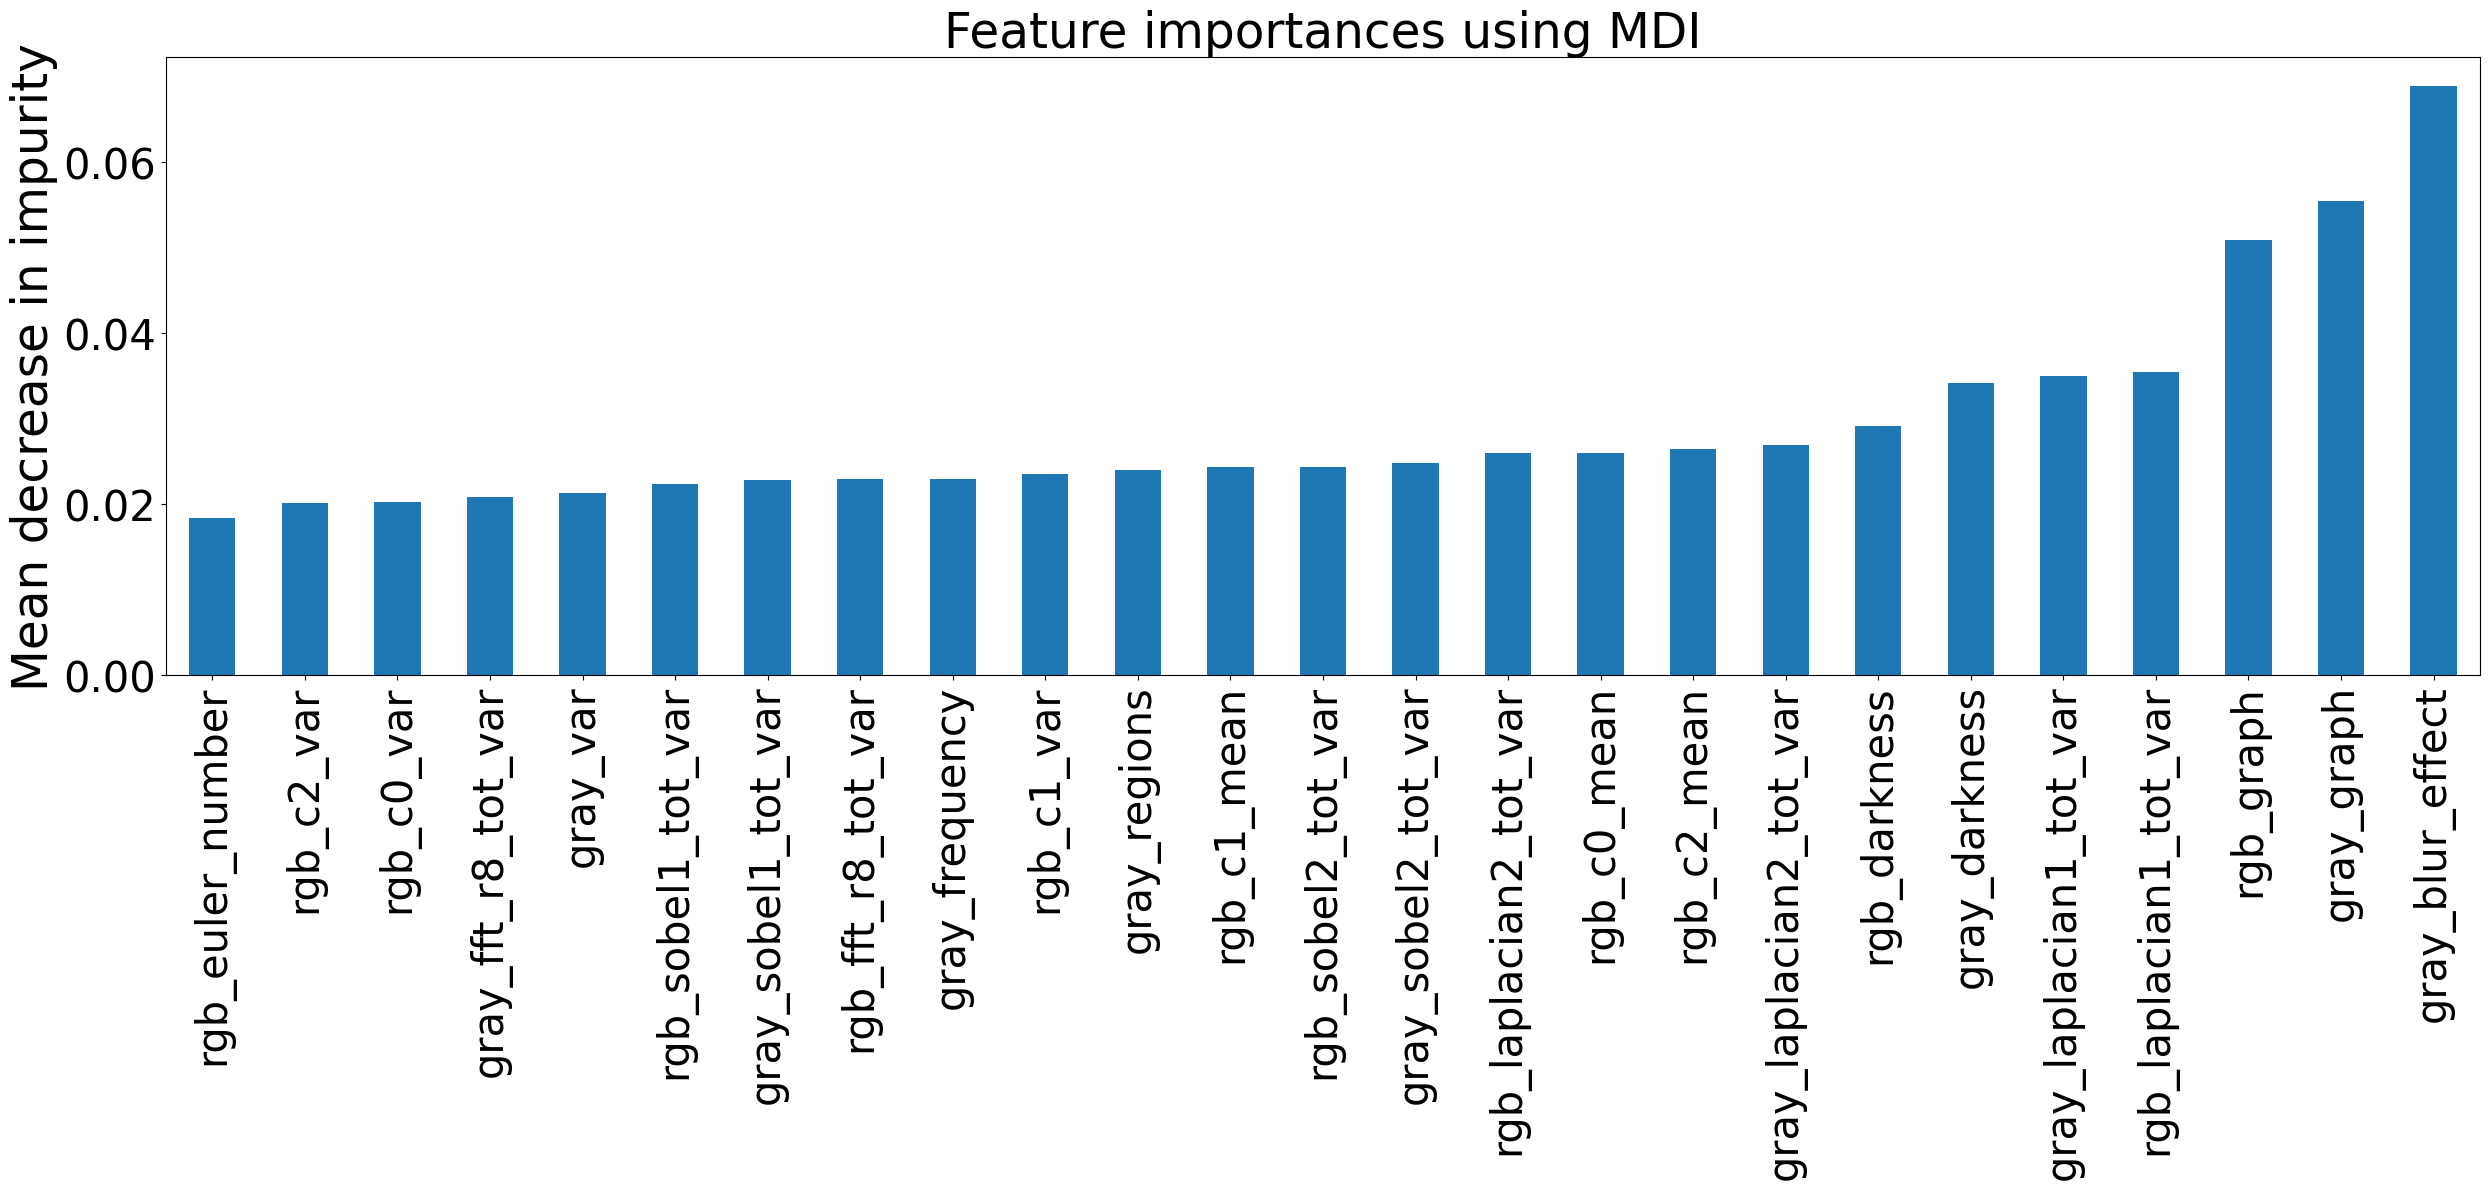

In [5]:
importances = model.feature_importances_
yerr = std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = Series(importances, index=x.columns)
fig, ax = subplots(figsize=(25, 12))
forest_importances.sort_values()[-25:].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.yaxis.get_label().set_fontsize(35)
ax.title.set_fontsize(35)
ax.tick_params(labelsize=30)
fig.tight_layout()

In [6]:
dump(model, 'model_random_forest_multi.joblib') 

['model_random_forest_multi.joblib']